# Exercício sobre otimização hiperparamétrica para regressão de preços de residências usando redes neurais densas (DNNs)

Neste exercício, você irá encontrar o melhor conjunto de hiperparâmetros de um modelo para regressão.

Leia atentamente o conteúdo de todas as células e sigas as intruções abaixo.

Ao final, responda:

+ Qual o melhor conjunto de hiperparâmetros encontrado?
+ Esse resultado é melhor do que aquele que encontramos em sala de aula?

### Nome: Hyago Vieira Lemes Barbosa Silva
### Matrícula: 922

## Importe as bibliotecas

Execute a célula abaixo.

In [1]:
# Instalando o KerasTuner.
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 42.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# Importamos a classe StandardScaler.
from sklearn.preprocessing import StandardScaler
# Importanda a biblioteca KerasTuner.
import keras_tuner as kt

Using TensorFlow backend


## Baixe a base de dados

Execute a célula abaixo.

In [4]:
data = tf.keras.datasets.boston_housing

(x_train, y_train), (x_test, y_test) = data.load_data()

57026/57026 [==============================] - 0s 0us/step


### Pradronize os dados

Execute a célula abaixo.

In [5]:
# Instanciamos um objeto da classe StandardScaler.
scaler = StandardScaler()

# Calcula-se os parâmetros de padronização usando o conjunto de treinamento.
scaler.fit(x_train)

# Usamos o método `transform` para padronizar os atributos de treinamento e teste.
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

## Encontre os melhores hiperparâmetros

### Defina a função de criação do modelo


Modifique a função abaixo de forma que a busca aleatória teste combinações aleatórias dos seguintes hiperparâmetros e valores:

1.   Número de camadas ocultas (`layers`): 1, 2 e 3.
2.   Número de neurônios nas camadas ocultas (`units`): 5, 10, 15, 20 e 25.
3.   Passo de aprendizagem do otmizador (`learning_rate`): 0.0003, 0.001 e 0.003.
4.   Otimizador (`optimizer`): 'sgd' e 'adam'.
5.   Função de ativação das camadas ocultas (`activation`): 'relu' e 'sigmoid'.

**Observação**

+ A busca deve demorar vários minutos, tenha paciência.


In [32]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch
import keras_tuner
# Defina a função de construção do modelo
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(13))

    # Número de camadas ocultas aleatoriamente (1, 2 ou 3).
    n_layers = hp.Choice("n_layers",[1,2,3])

    # Opções de número de neurônios para testar.
    num_neurons_options = [5, 10, 15, 20, 25]

    # De acordo com a quantidade aleatória de camadas, escolhendo a quantidade de neurônios para cada e função de ativação
    if(n_layers==1):
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_camada1_apenas = hp.Choice(f'units', num_neurons_options)
          # Funç~]ao de ativação escolhida aleatóriamente para camada oculta
          activation = hp.Choice(f'activation', ["relu", "sigmoid"])
          # Escolhendo o otimizador de forma aleatória
          optimizer = hp.Choice("optimizer", ["sgd", "adam"])
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_camada1_apenas, activation=activation))
    elif(n_layers==2):
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_camada1_apenas = hp.Choice(f'units', num_neurons_options)
          # Funç~]ao de ativação escolhida aleatóriamente para camada oculta
          activation = hp.Choice(f'activation', ["relu", "sigmoid"])
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_camada1_apenas, activation=activation))
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_camada2_apenas = hp.Choice(f'units', num_neurons_options)
          # Funç~]ao de ativação escolhida aleatóriamente para camada oculta
          activation_cam2 = hp.Choice(f'activation', ["relu", "sigmoid"])
          # Escolhendo o otimizador de forma aleatória
          optimizer = hp.Choice("optimizer", ["sgd", "adam"])
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_camada2_apenas, activation=activation_cam2))
    elif(n_layers==3):
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_camada1_apenas = hp.Choice(f'units', num_neurons_options)
          # Funç~]ao de ativação escolhida aleatóriamente para camada oculta
          activation = hp.Choice(f'activation', ["relu", "sigmoid"])
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_camada1_apenas, activation=activation))
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_camada2_apenas = hp.Choice(f'units', num_neurons_options)
          # Funç~]ao de ativação escolhida aleatóriamente para camada oculta
          activation_cam2 = hp.Choice(f'activation', ["relu", "sigmoid"])
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_camada2_apenas, activation=activation_cam2))
          # Selecionando aleatóriamente o número de neurônios na camada oculta
          num_neurons_camada3_apenas = hp.Choice(f'units', num_neurons_options)
          # Funç~]ao de ativação escolhida aleatóriamente para camada oculta
          activation_cam3 = hp.Choice(f'activation', ["relu", "softmax"])
          # Escolhendo o otimizador de forma aleatória
          optimizer = hp.Choice("optimizer", ["sgd", "adam"])
          # Adicionando esta camada densa com este tipo de configuração, x neuronios com y função de ativação
          model.add(tf.keras.layers.Dense(units=num_neurons_camada3_apenas, activation=activation_cam3))
    # Escolhendo o passo de aprendizado de forma aleatória
    learning_rate = hp.Choice("learning_rate", [0.0003, 0.001, 0.003])
    # Adicionando a camada de saída.
    model.add(tf.keras.layers.Dense(1))

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


### Instancie o objeto de busca aleatória

Execute as células abaixo.

In [7]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Número de tentativas
    directory='./untitled_project',  # Diretório para salvar os resultados
    project_name='my_project'  # Nome do projeto
)


#### Faça a busca pelo melhor modelo.

Execute as células abaixo.

In [8]:
tuner.search(
    x_train_std, y_train,
    epochs=500,
    validation_data=(x_test_std, y_test)
)

Trial 10 Complete [00h 00m 31s]
val_loss: 9.372127532958984

Best val_loss So Far: 9.372127532958984
Total elapsed time: 00h 06m 13s


Obtendo os melhores hiperparâmetros.

Imprimindo o resumo dos resultados da busca.

In [25]:
tuner.results_summary()

Results summary
Results in ./untitled_project/my_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 09 summary
Hyperparameters:
n_layers: 3
units: 10
activation: sigmoid
optimizer: sgd
learning_rate: 0.0003
Score: 9.372127532958984

Trial 02 summary
Hyperparameters:
n_layers: 1
units: 20
activation: relu
optimizer: sgd
learning_rate: 0.003
Score: 10.806730270385742

Trial 05 summary
Hyperparameters:
n_layers: 2
units: 20
activation: relu
optimizer: sgd
learning_rate: 0.001
Score: 11.932592391967773

Trial 07 summary
Hyperparameters:
n_layers: 2
units: 20
activation: relu
optimizer: adam
learning_rate: 0.0003
Score: 12.076844215393066

Trial 03 summary
Hyperparameters:
n_layers: 1
units: 15
activation: relu
optimizer: sgd
learning_rate: 0.0003
Score: 13.24790096282959

Trial 08 summary
Hyperparameters:
n_layers: 1
units: 20
activation: relu
optimizer: sgd
learning_rate: 0.001
Score: 15.476445198059082

Trial 00 summary
Hyperparameters:
n_layers: 2
units: 1

## Obtenha e construa o melhor modelo

Execute a célula abaixo.

In [26]:
best_model = tuner.get_best_models(1)[0]

best_model.build(input_shape=(13,))

best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Avalie o melhor modelo nos conjuntos de treinamento e teste.

Execute as células abaixo.

In [27]:
train_eval = best_model.evaluate(x_train_std, y_train)

print ("MSE no conjunto de treinamento: {:.5}".format(train_eval[0]))
print ("MAE no conjunto de treinamento: {:.5}".format(train_eval[1]))

13/13 [==============================] - 0s 1ms/step - loss: 2.8011 - mae: 1.2614
MSE no conjunto de treinamento: 2.8011
MAE no conjunto de treinamento: 1.2614


In [28]:
test_eval = best_model.evaluate(x_test_std, y_test)

print ("MSE no conjunto de teste: {:.5}".format(test_eval[0]))
print ("MAE no conjunto de teste: {:.5}".format(test_eval[1]))



4/4 [==============================] - 0s 2ms/step - loss: 9.3721 - mae: 2.2037
MSE no conjunto de teste: 9.3721
MAE no conjunto de teste: 2.2037


In [29]:
y_hat = best_model.predict(x_test_std)

print(y_hat[:5]) # obtém as predições para as 5 primeiras amostras do conjunto de teste

4/4 [==============================] - 0s 1ms/step
[[ 8.887034]
 [18.476282]
 [21.518188]
 [28.727821]
 [24.484373]]


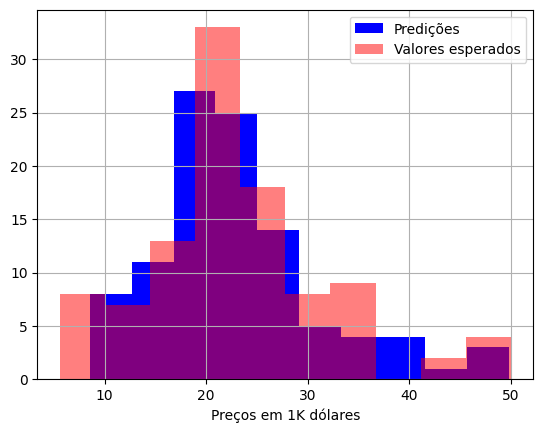

In [31]:
plt.hist(y_hat, label='Predições', color = 'b')
plt.hist(y_test, label = 'Valores esperados', color = 'r', alpha=0.5)
plt.xlabel('Preços em 1K dólares')
plt.legend()
plt.grid()
plt.show()

# <font color='orange'> Qual o melhor conjunto de hiperparâmetros encontrado?

## <font size=6px color='darkorange'> Melhor conjunto foi com as seguintes configurações:

    O número ideal de camadas ocultas é igual 3.

    O número ideal de neurônios nas 3 camadas ocultas é 10.

    O valor ideal do passo de aprendizagem é o 0.003.

    O otimizador ideal é sgd.

    A função de ativação ideal é a sigmoid.

O número ideal de camadas ocultas é 2.
O número ideal de neurônios na camada oculta # 1 é 25.
O número ideal de neurônios na camada oculta # 2 é 25.
O valor ideal do passo de aprendizagem é o 0.0003.
O otimizador ideal é sgd.
A função de ativação ideal é a relu.


  ## Tentativa 5
  ### **index dos valores hyperparamétricos:**

<font size=6px>
      
      - número de camadas: 3

      - activation: sigmoid

      - learning_rate: 0.003

      - optimizer: sgd

      - camada oculta: 10 neurônios/camada
   

    Menor score possível:
      - Score: 9.372127532958984

# <font color='orange'> Esse resultado é melhor do que aquele que encontramos em sala de aula?

## Sim na aula obtivemos aproximadamente um score de 18 a 17 aproximadamente aqui obtive 9 aproximadamente para o valor de score, e o que tínha escrito aqui tinha um score de 12 aproximadamente, consegui algo menor ainda sobre! Veja a figura da predição e do que era esperado acima, com histograma.
